In [1]:
import tensorflow as tf

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [107]:
#!pip install pandas_datareader

In [6]:
#!pip install finance-datareader

In [3]:
from tqdm import tqdm as tq

In [4]:
ans = 0
for i in tq(range(1000)):
    for j in range(1000):
        for k in range(1000):
            ans+=k
print(ans)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.54it/s]

499500000000


In [3]:
import warnings
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [108]:
import pandas_datareader as pdr

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# https://github.com/FinanceData/FinanceDataReader
# 금, 은과 같은 현물, 달러와 같은 화폐 데이터

In [6]:
# finance datareader로부터 데이터 불러오기

# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
#ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')
data = fdr.DataReader('069500')
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-14,5432,5571,5283,5412,3690121,NaN
2002-10-15,5469,5557,5363,5545,3277092,0.024575
2002-10-16,5601,5601,5508,5569,2919684,0.004328
2002-10-17,5557,5699,5482,5646,2995040,0.013827
2002-10-18,5783,5921,5747,5886,1891859,0.042508
...,...,...,...,...,...,...
2022-05-18,34990,35145,34770,34870,6376438,0.001868
2022-05-19,34125,34450,34060,34370,6054919,-0.014339
2022-05-20,34515,35025,34485,34985,4661990,0.017894


In [113]:
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')
df_silver

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

In [7]:
data = data.reset_index()

data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change']
data['Date'] = pd.to_datetime(data['Date'])

data.index = data['Date']
data.set_index('Date', inplace=True)

data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-14,5432,5571,5283,5412,3690121,NaN
2002-10-15,5469,5557,5363,5545,3277092,0.024575
2002-10-16,5601,5601,5508,5569,2919684,0.004328
2002-10-17,5557,5699,5482,5646,2995040,0.013827
2002-10-18,5783,5921,5747,5886,1891859,0.042508
...,...,...,...,...,...,...
2022-05-18,34990,35145,34770,34870,6376438,0.001868
2022-05-19,34125,34450,34060,34370,6054919,-0.014339
2022-05-20,34515,35025,34485,34985,4661990,0.017894


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4851 entries, 2002-10-14 to 2022-05-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4851 non-null   int64  
 1   High    4851 non-null   int64  
 2   Low     4851 non-null   int64  
 3   Close   4851 non-null   int64  
 4   Volume  4851 non-null   int64  
 5   Change  4850 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 265.3 KB


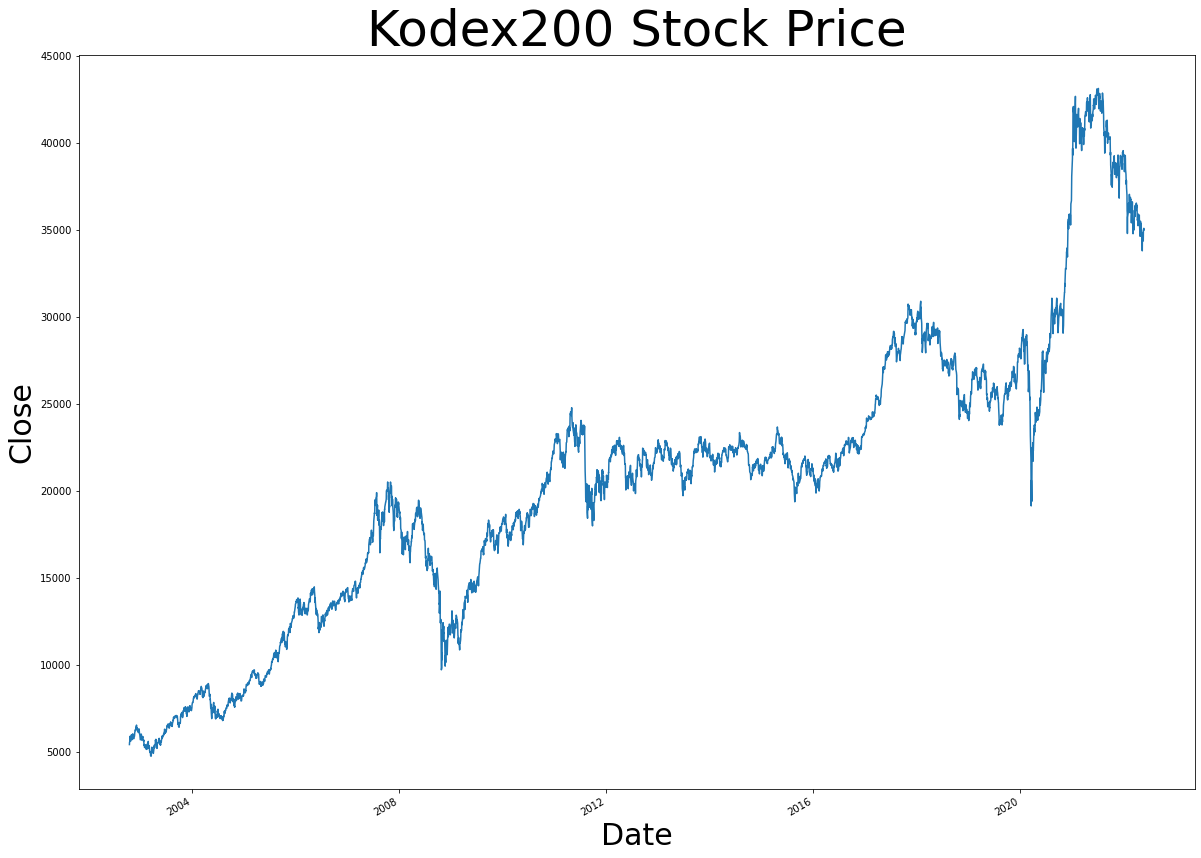

In [9]:
fig = plt.subplots(figsize=(20, 15))
data['Close'].plot()
plt.title("Kodex200 Stock Price",fontsize=50)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close', fontsize=30)
plt.show()

# Normalization

In [10]:
scaler = MinMaxScaler()

columns = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled_data = scaler.fit_transform(data[columns])
scaled_data

array([[0.01472623, 0.01762194, 0.01540748, 0.01724183, 0.0565942 ],
       [0.01569232, 0.01726178, 0.01749309, 0.02070582, 0.0499376 ],
       [0.01913888, 0.0183937 , 0.02127327, 0.0213309 , 0.04417741],
       ...,
       [0.77409332, 0.77533958, 0.7767089 , 0.78747233, 0.07225739],
       [0.79028173, 0.78048467, 0.78791908, 0.79046751, 0.09182346],
       [0.78545132, 0.7754682 , 0.78687627, 0.787863  , 0.00178865]])

In [11]:
scaled_data = pd.DataFrame(scaled_data, columns=columns)
scaled_data

,Open,High,Low,Close,Volume
0,0.014726,0.017622,0.015407,0.017242,0.056594
1,0.015692,0.017262,0.017493,0.020706,0.049938
2,0.019139,0.018394,0.021273,0.021331,0.044177
3,0.017990,0.020915,0.020595,0.023336,0.045392
4,0.023891,0.026626,0.027504,0.029587,0.027612
...,...,...,...,...,...
4846,0.786496,0.778427,0.784139,0.784477,0.099888
4847,0.763910,0.760547,0.765629,0.771455,0.094707
4848,0.774093,0.775340,0.776709,0.787472,0.072257
4849,0.790282,0.780485,0.787919,0.790468,0.091823


In [25]:
scaled_data.index = data.index

In [26]:
scaled_data

,Open,High,Low,Close,Volume
Date,,,,,
2002-10-14,0.014726,0.017622,0.015407,0.017242,0.056594
2002-10-15,0.015692,0.017262,0.017493,0.020706,0.049938
2002-10-16,0.019139,0.018394,0.021273,0.021331,0.044177
2002-10-17,0.017990,0.020915,0.020595,0.023336,0.045392
2002-10-18,0.023891,0.026626,0.027504,0.029587,0.027612
...,...,...,...,...,...
2022-05-18,0.786496,0.778427,0.784139,0.784477,0.099888
2022-05-19,0.763910,0.760547,0.765629,0.771455,0.094707
2022-05-20,0.774093,0.775340,0.776709,0.787472,0.072257


# LSTM 초안 (가격만으로)

In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Conv1D

In [ ]:
# compute mid price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [92]:
# create windows
# 최근 50일간의 데이터를 바탕으로 다음날 예측
window_size = 50
sequence_length = window_size + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])
len(result)
#4800개의 window 생성

4800

In [95]:
normalized_data = []
window_mean = []
window_std = []

for window in result:
    normalized_window = [((p - np.mean(window)) / np.std(window)) for p in window]
    normalized_data.append(normalized_window)
    window_mean.append(np.mean(window))
    window_std.append(np.std(window))
result = np.array(normalized_data)

In [77]:
train[0]

array([-2.1250841 , -2.00161971, -1.64806258, -1.51337416, -0.60235659,
       -0.79129452, -1.18787712, -1.36184967, -0.94468968, -0.94094833,
       -0.34233309, -0.17210188, -0.63977004, -0.67344215, -1.04009398,
       -0.58926188, -0.46953883, -0.11972305,  0.05424951, -0.42090134,
       -0.66221811, -1.05505936, -0.99332716, -0.89979353, -0.43399605,
       -0.30491964, -0.41903067, -0.12720574,  0.61732197,  0.72956232,
        0.79316519,  0.81374259,  0.77819981,  1.3805564 ,  1.35062564,
        1.55639963,  1.80894043,  1.39365111,  1.25896268,  1.27205739,
        1.12801559,  0.68466618,  0.70150224,  0.87547479,  0.80251856,
        0.50321094,  0.83431999,  0.88108681,  1.045706  ,  0.9091469 ,
        0.30679031])

In [96]:
train = result[:4700, :]
#np.random.shuffle(train)
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

In [97]:
len(x_train)

4700

In [99]:
x_test = result[4700:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[4700:, -1]


In [100]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # 50 -> window size

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear')) # 다음날 하루 예측

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
470/470 [==============================] - 22s 16ms/step - loss: 0.4454 - val_loss: 0.2444
Epoch 2/20
470/470 [==============================] - 7s 15ms/step - loss: 0.1415 - val_loss: 0.2291
Epoch 3/20
470/470 [==============================] - 7s 15ms/step - loss: 0.1437 - val_loss: 0.2447
Epoch 4/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1315 - val_loss: 0.2761
Epoch 5/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1376 - val_loss: 0.2386
Epoch 6/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1380 - val_loss: 0.2496
Epoch 7/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1372 - val_loss: 0.2459
Epoch 8/20
470/470 [==============================] - 7s 15ms/step - loss: 0.1344 - val_loss: 0.2641
Epoch 9/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1360 - val_loss: 0.2536
Epoch 10/20
470/470 [==============================] - 7s 14ms/step - loss: 0.1409 - val_l

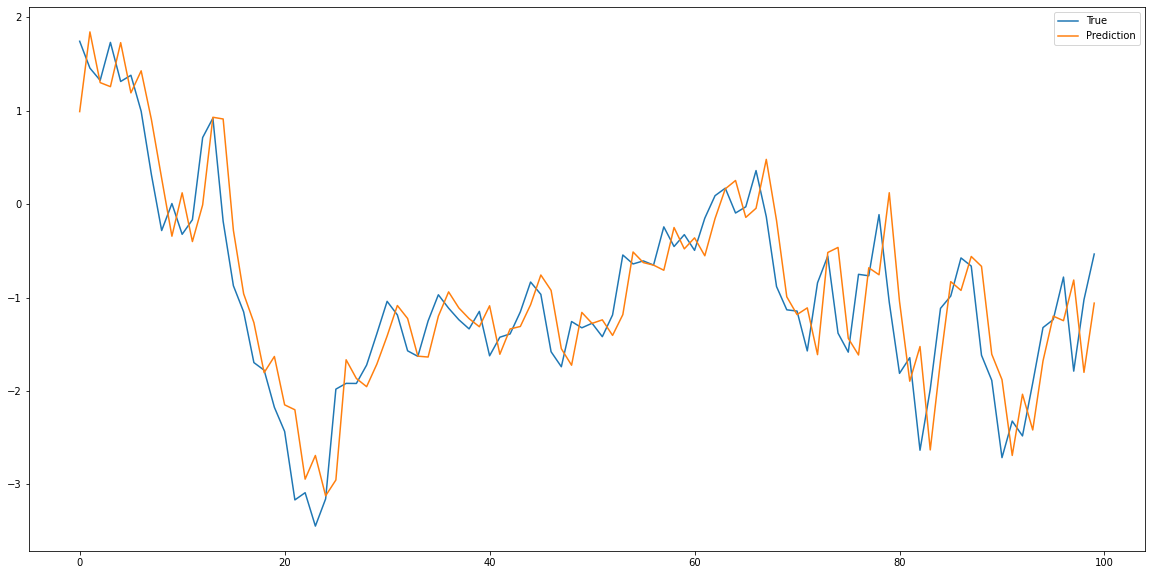

In [102]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

# LSTM 뉴스 기사 + 거시경제지표 이용 분석

# train, test data 분할

In [27]:
X = scaled_data.drop(columns='Close')

In [28]:
X

,Open,High,Low,Volume
Date,,,,
2002-10-14,0.014726,0.017622,0.015407,0.056594
2002-10-15,0.015692,0.017262,0.017493,0.049938
2002-10-16,0.019139,0.018394,0.021273,0.044177
2002-10-17,0.017990,0.020915,0.020595,0.045392
2002-10-18,0.023891,0.026626,0.027504,0.027612
...,...,...,...,...
2022-05-18,0.786496,0.778427,0.784139,0.099888
2022-05-19,0.763910,0.760547,0.765629,0.094707
2022-05-20,0.774093,0.775340,0.776709,0.072257


In [29]:
y = scaled_data.iloc[:, 3:4]
print(y)

               Close
Date                
2002-10-14  0.017242
2002-10-15  0.020706
2002-10-16  0.021331
2002-10-17  0.023336
2002-10-18  0.029587
...              ...
2022-05-18  0.784477
2022-05-19  0.771455
2022-05-20  0.787472
2022-05-23  0.790468
2022-05-24  0.787863

[4851 rows x 1 columns]


In [33]:
X_train = X.iloc[:-100, :] 
X_test = X.iloc[-100:, : ]
X_test


,Open,High,Low,Volume
Date,,,,
2021-12-27,0.904071,0.890667,0.900855,0.058247
2021-12-28,0.901773,0.892185,0.897388,0.080000
2021-12-29,0.906003,0.896481,0.905600,0.067700
2021-12-30,0.904462,0.893445,0.898535,0.060386
2022-01-03,0.902034,0.895709,0.899447,0.077753
...,...,...,...,...
2022-05-18,0.786496,0.778427,0.784139,0.099888
2022-05-19,0.763910,0.760547,0.765629,0.094707
2022-05-20,0.774093,0.775340,0.776709,0.072257


In [36]:
y_train = y.iloc[:-100, :] 
y_test = y.iloc[-100:, :]
y_test

,Close
Date,
2021-12-27,0.898502
2021-12-28,0.906837
2021-12-29,0.904519
2021-12-30,0.898268
2022-01-03,0.900664
...,...
2022-05-18,0.784477
2022-05-19,0.771455
2022-05-20,0.787472


In [37]:
# 종가만 추출
close = data['Close']

# 비교 기준 구간
start_date = '2021-12-27'
end_date = '2022-05-23'

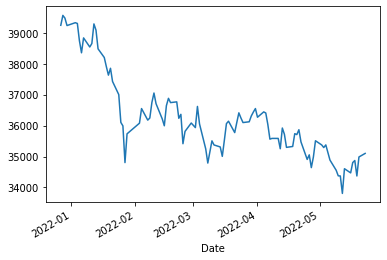

In [38]:
# 기준 구간 시계열 차트
close[start_date:end_date].plot();